# Test using jax and blackjax to estimate the parameters

https://github.com/blackjax-devs/blackjax

https://github.com/blackjax-devs/blackjax/blob/main/examples/Introduction.ipynb

https://github.com/pymc-devs/pymc/blob/main/pymc/sampling_jax.py

In [1]:
# !pip install --user blackjax

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import corner

from oceanoi.oijax import OptimalInterpJax
import jax.numpy as jnp
from oceanoi.mcmc_jax import mcmc_jax, mcmc_jax_debug, JaxPrior
from oceanoi import covjax 
from oceanoi import cov


import jax.scipy.stats as jstats
from jax import random as jrandom
import jax.scipy.linalg as jla
import jax

import blackjax

In [2]:
# jax.config.update("jax_debug_nans", True) 

CPU times: user 1.68 s, sys: 263 ms, total: 1.94 s
Wall time: 1.59 s


(25.0, (300,))

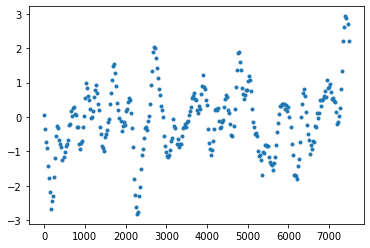

In [3]:
%%time
# np.random.seed(1) # this generates the same output every time
# Generate some training data

####
# Change these parameters here
noise = 0.1
η = 1.
ℓ = 100
covfunc = covjax.expquad_1d
####

covparams = (η, ℓ)


dx = 25.
N = 300

xd = np.arange(0,dx*N,dx)
xo = np.linspace(-10*dx,dx*N+dx*10,N*10)

# K = covfunc(xd[:,None], xd[:,None].T, covparams)
# mu = np.zeros_like(xd)
# yd = np.random.multivariate_normal(mu.ravel(), K, 1).ravel()
# yd += noise*np.random.normal(size=(N,))

myOI = OptimalInterpJax(xd[:,None], xd[:,None], noise, covfunc, covparams)
yd = myOI.prior(noise=0)

plt.figure()
plt.plot(xd, yd,'.')
dx, xd.shape

In [4]:
%%time
# initvals = jnp.array([0.5, 5., 20])
initvals = None

priors = [JaxPrior('invgamma', 2. ),
         JaxPrior('invgamma', 1,), 
         JaxPrior('norm', 100, 25),]

ncovparams = len(priors)  

CPU times: user 2.1 ms, sys: 0 ns, total: 2.1 ms
Wall time: 2.11 ms


In [5]:
states = mcmc_jax_debug(
    xd[:,None], yd, 
    covfunc, 
    None, 
    priors,
    ncovparams,
    mean_kwargs={},
    cov_kwargs={},
    niter=5,
    oi_kwargs={},
    initvals=initvals,
    step_size=1e-3,
    inverse_mass_matrix=jnp.array([1., 1., 1.]))

/home/jupyter-ubuntu/.local/lib/python3.7/site-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)


HMCState(position=DeviceArray([ 0.43880089,  1.86577686, 48.89835504], dtype=float64), potential_energy=DeviceArray(283.70386989, dtype=float64), potential_energy_grad=DeviceArray([341.33646125,  66.91961902,  -3.42294079], dtype=float64))
HMCState(position=DeviceArray([ 0.42320584,  1.85875468, 48.88960162], dtype=float64), potential_energy=DeviceArray(277.8728239, dtype=float64), potential_energy_grad=DeviceArray([349.82275897,  67.66896506,  -3.50238507], dtype=float64))
HMCState(position=DeviceArray([ 0.3919297 ,  1.87470701, 48.87973079], dtype=float64), potential_energy=DeviceArray(267.79337754, dtype=float64), potential_energy_grad=DeviceArray([366.83876799,  68.74686239,  -3.7107308 ], dtype=float64))
HMCState(position=DeviceArray([ 0.35245061,  1.87420817, 48.90332187], dtype=float64), potential_energy=DeviceArray(252.70097626, dtype=float64), potential_energy_grad=DeviceArray([391.87033074,  70.48141049,  -3.96959699], dtype=float64))
HMCState(position=DeviceArray([ 0.3211450

In [5]:
states = mcmc_jax(
    xd[:,None], yd, 
    covfunc, 
    None, 
    priors,
    ncovparams,
    mean_kwargs={},
    cov_kwargs={},
    nwarmup=1000, 
    niter=500,
    oi_kwargs={},
    initvals=initvals,
    step_size=1e-3,
    inverse_mass_matrix=jnp.array([1., 1., 1.]))

Running window adaptation



Iteration 25 / 500
Iteration 50 / 500
Iteration 75 / 500
Iteration 100 / 500
Iteration 125 / 500
Iteration 150 / 500
Iteration 175 / 500
Iteration 200 / 500
Iteration 225 / 500
Iteration 250 / 500
Iteration 275 / 500
Iteration 300 / 500
Iteration 325 / 500
Iteration 350 / 500
Iteration 375 / 500
Iteration 400 / 500
Iteration 425 / 500
Iteration 450 / 500
Iteration 475 / 500
Iteration 500 / 500


In [17]:
def expcosine(x, xpr, params):
    eta, l, T = params
    K1 = covjax.matern12(x, xpr, l)
    K2 = covjax.cosine(x, xpr, T)
    return eta**2 * K1*K2

CPU times: user 54.6 ms, sys: 82.3 ms, total: 137 ms
Wall time: 45 ms


(25.0, (512,))

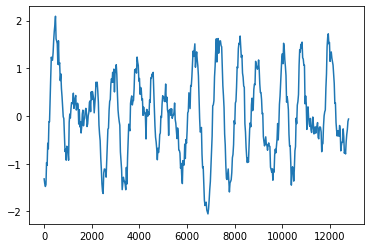

In [20]:
%%time
# np.random.seed(1) # this generates the same output every time
# Generate some training data

####
# Change these parameters here
noise = 0.1
η = 1.
ℓ = 2000.
T = np.sqrt(500.)
covfunc = expcosine
####

covparams = (η, ℓ, T)

dx = 25.
N = 512

xd = np.arange(0,dx*N,dx)
xo = np.linspace(-10*dx,dx*N+dx*10,N*10)

# K = covfunc(xd[:,None], xd[:,None].T, covparams)
# mu = np.zeros_like(xd)
# yd = np.random.multivariate_normal(mu.ravel(), K, 1).ravel()
# yd += noise*np.random.normal(size=(N,))

myOI = OptimalInterpJax(xd[:,None], xd[:,None], noise, covfunc, covparams)
yd = myOI.prior(noise=0)

plt.figure()
plt.plot(xd, yd,'-')
dx, xd.shape

In [21]:
# initvals = jnp.array([0.5, 5., 20])
initvals = None

priors = [JaxPrior('invgamma', 10. ),
         JaxPrior('invgamma', 5.), 
         JaxPrior('norm', 2000, 1000),
         JaxPrior('norm', 24, 3),
         ]

ncovparams = len(priors)  

In [22]:
states = mcmc_jax_debug(
    xd[:,None], yd, 
    covfunc, 
    None, 
    priors,
    ncovparams,
    mean_kwargs={},
    cov_kwargs={},
    niter=5,
    oi_kwargs={},
    initvals=initvals,
    step_size=1e-3,
    inverse_mass_matrix=jnp.array([1., 1., 1., 1.]))

/home/jupyter-ubuntu/.local/lib/python3.7/site-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)


HMCState(position=DeviceArray([1.22705639e-01, 3.06747724e-01, 2.16765362e+03,
             2.45385644e+01], dtype=float64), potential_energy=DeviceArray(401.09715369, dtype=float64), potential_energy_grad=DeviceArray([-2.99506522e+03, -2.87727901e+03,  1.86047274e-01,
              9.10102699e+01], dtype=float64))
HMCState(position=DeviceArray([1.39474358e-01, 3.12161104e-01, 2.16765207e+03,
             2.45377292e+01], dtype=float64), potential_energy=DeviceArray(347.1298062, dtype=float64), potential_energy_grad=DeviceArray([-1.79458219e+03, -2.50098868e+03,  1.63522157e-01,
              8.47309247e+01], dtype=float64))
HMCState(position=DeviceArray([1.51912066e-01, 3.36630186e-01, 2.16765237e+03,
             2.45459276e+01], dtype=float64), potential_energy=DeviceArray(276.82749911, dtype=float64), potential_energy_grad=DeviceArray([-9.83126896e+02, -1.94134645e+03,  1.37101931e-01,
              7.25673847e+01], dtype=float64))
HMCState(position=DeviceArray([1.54082441e-01, 3.3

In [23]:
%%time
states = mcmc_jax(
    xd[:,None], yd, 
    covfunc, 
    None, 
    priors,
    ncovparams,
    mean_kwargs={},
    cov_kwargs={},
    niter=500,
    nwarmup=1000,
    oi_kwargs={},
    initvals=initvals,
    step_size=1e-3,
    inverse_mass_matrix=jnp.array([1., 1., 1., 1.]))

Running window adaptation



Iteration 25 / 500
Iteration 50 / 500
Iteration 75 / 500
Iteration 100 / 500
Iteration 125 / 500
Iteration 150 / 500
Iteration 175 / 500
Iteration 200 / 500
Iteration 225 / 500
Iteration 250 / 500
Iteration 275 / 500
Iteration 300 / 500
Iteration 325 / 500
Iteration 350 / 500
Iteration 375 / 500
Iteration 400 / 500
Iteration 425 / 500
Iteration 450 / 500
Iteration 475 / 500
Iteration 500 / 500
CPU times: user 1h 1min 50s, sys: 1h 11min 53s, total: 2h 13min 43s
Wall time: 33min 45s


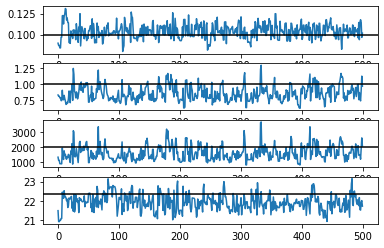

In [24]:
plt.figure()
plt.subplot(411)
plt.plot(states[0][:,0])
plt.axhline(noise,c='k')
# plt.axhline(-noise,c='k')

plt.subplot(412)
plt.plot(states[0][:,1])
plt.axhline(η,c='k')

plt.subplot(413)
plt.plot(states[0][:,2])
plt.axhline(ℓ, c='k')

plt.subplot(414)
plt.plot(states[0][:,3])
plt.axhline(T, c='k')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-436.72100369, -306.84845593, -176.97590817,  -47.10336041,
          82.76918735,  212.64173511,  342.51428286,  472.38683062,
         602.25937838,  732.13192614,  862.0044739 ,  991.87702166,
        1121.74956942, 1251.62211717, 1381.49466493, 1511.36721269,
        1641.23976045, 1771.11230821, 1900.98485597, 2030.85740373,
        2160.72995148, 2290.60249924, 2420.475047  , 2550.34759476,
        2680.22014252, 2810.09269028, 2939.96523803, 3069.83778579,
        3199.71033355, 3329.58288131, 3459.45542907, 3589.32797683,
        3719.20052459, 3849.07307234, 3978.9456201 , 4108.81816786,
        4238.69071562, 4368.56326338, 4498.43581114, 4628.30835889,
        4758.18090665]),
 <a list of 500 BarContainer objects>)

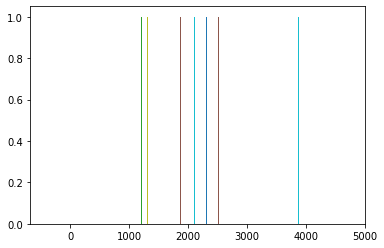

In [44]:
plt.figure()
plt.hist([JaxPrior('invgamma', 5. ).rvs() for _ in range(500)], bins=50)
# plt.hist(states[0][:,2], bins=40)

# Code development below here

In [5]:
def logprob_fn( params):

    noise = params[0]
    covparams = params[1:]
    
    myOI = OptimalInterpJax(xd[:,None], xd[:,None], noise, covfunc, covparams)
    logp = myOI.log_marg_likelihood(yd)
    
    # Add on the priors
    p1 = jstats.norm.logpdf(noise, 0, 0.2)
    p2 = jstats.norm.logpdf(covparams[0], 1, 0.5)
    p3 = jstats.norm.logpdf(covparams[1], 100, 25)
    logprior = p1+p2+p3
    
    return logp + logprior



In [6]:
# Build the kernel
step_size = 1e-3
inverse_mass_matrix = jnp.array([1., 1., 1.])
nuts = blackjax.nuts(logprob_fn, step_size, inverse_mass_matrix)

In [7]:
initval = jnp.array([0.5, 5., 20])

# Testing
#logprob_fn(initval)

In [8]:
initial_state = nuts.init(initval)

In [9]:
seed = jax.random.PRNGKey(1234)

adapt = blackjax.window_adaptation(blackjax.nuts, logprob_fn, 1000, progress_bar=True)
last_state, kernel, _ = adapt.run(seed, initval)

Running window adaptation


/home/jupyter-ubuntu/.local/lib/python3.7/site-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)


In [69]:
# from https://www.jeremiecoullon.com/2021/01/29/jax_progress_bar/
from jax.experimental import host_callback

def _print_consumer(arg, transform):
    iter_num, num_samples = arg
    print(f"Iteration {iter_num:,} / {num_samples:,}")

@jax.jit
def progress_bar(arg, result):
    """
    Print progress of a scan/loop only if the iteration number is a multiple of the print_rate

    Usage: `carry = progress_bar((iter_num + 1, num_samples, print_rate), carry)`
    Pass in `iter_num + 1` so that counting starts at 1 and ends at `num_samples`

    """
    iter_num, num_samples, print_rate = arg
    result = jax.lax.cond(
        iter_num % print_rate==0,
        lambda _: host_callback.id_tap(_print_consumer, (iter_num, num_samples), result=result),
        lambda _: result,
        operand=None)
    return result

def progress_bar_scan(num_samples, print_int=10):
    #num_samples=len(keys)
    def _progress_bar_scan(func):
        print_rate = int(num_samples/print_int)
        def wrapper_progress_bar(carry, iter_num):
            iter_num = progress_bar((iter_num + 1, num_samples, print_rate), iter_num)
            return func(carry, iter_num)
        return wrapper_progress_bar
    return _progress_bar_scan


In [70]:
def inference_loop(rng_key, kernel, initial_state, num_samples, print_intervals=20):
    
    keys = jax.random.split(rng_key, num_samples)
    
    @jax.jit
    @progress_bar_scan(num_samples, print_int=print_intervals)
    def one_step(state, iter_num):
        rng_key = keys[iter_num]
        state, _ = kernel(rng_key, state)
        return state, state
    
    #def one_step(state, rng_key):
    #    state, _ = kernel(rng_key, state)
    #    return state, state
    
    #_, states = jax.lax.scan(one_step, initial_state, keys)
    _, states = jax.lax.scan(one_step, initial_state, jnp.arange(num_samples))
    return states

In [71]:
rng_key = jax.random.PRNGKey(0)

In [72]:
%%time
# Use the warmed-up values
initial_state = nuts.init(last_state.position)
states = inference_loop(rng_key, kernel, initial_state, 1000)

Traced<ShapedArray(int64[])>with<DynamicJaxprTrace(level=1/1)>


/home/jupyter-ubuntu/.local/lib/python3.7/site-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)


Iteration 50 / 1,000
Iteration 100 / 1,000
Iteration 150 / 1,000
Iteration 200 / 1,000
Iteration 250 / 1,000
Iteration 300 / 1,000
Iteration 350 / 1,000
Iteration 400 / 1,000
Iteration 450 / 1,000
Iteration 500 / 1,000
Iteration 550 / 1,000
Iteration 600 / 1,000
Iteration 650 / 1,000
Iteration 700 / 1,000
Iteration 750 / 1,000
Iteration 800 / 1,000
Iteration 850 / 1,000
Iteration 900 / 1,000
Iteration 950 / 1,000
Iteration 1,000 / 1,000
CPU times: user 1min 1s, sys: 53.1 s, total: 1min 54s
Wall time: 31.3 s


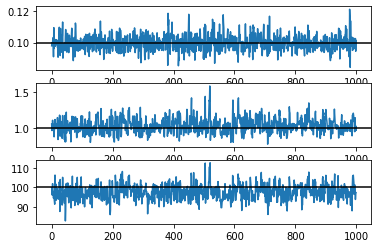

In [73]:

plt.figure()
plt.subplot(311)
plt.plot(states[0][:,0])
plt.axhline(noise,c='k')

plt.subplot(312)
plt.plot(states[0][:,1])
plt.axhline(η,c='k')

plt.subplot(313)
plt.plot(states[0][:,2])
plt.axhline(ℓ,c='k')


σ: 0.1, η: 1.0, ℓ: 100


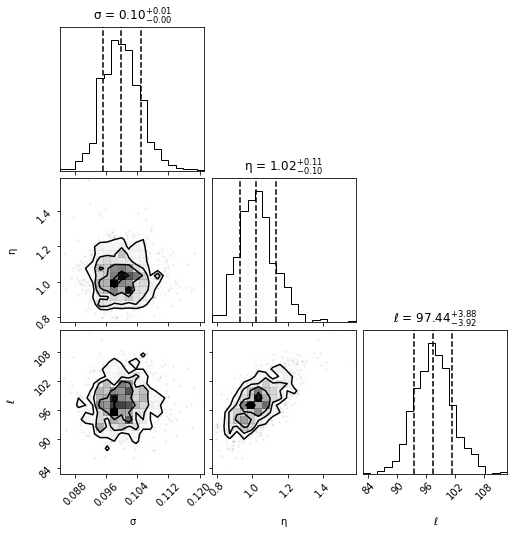

In [74]:
# Corner plot
labels = ['σ','η','ℓ']
fig = corner.corner(np.array(states[0]),show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
print('σ: {}, η: {}, ℓ: {}'.format(noise, η, ℓ))

# Put it all into a function

In [90]:
# Need to create classes for the priors so they behave like scipy.stats.rvs

class JaxPrior(object):
    def __init__(self, statsclass, *args):
        self.args = args
        self.statsclass = statsclass
    def logpdf(self, value):
        return self.statsclass.logpdf(value, *self.args)

In [102]:
# Testing
JaxPrior(jstats.norm, 0, 0.2).logpdf(0.1), JaxPrior(jstats.uniform, 0, 1).logpdf(1.1)


(DeviceArray(0.56549938, dtype=float64, weak_type=True),
 DeviceArray(-inf, dtype=float64, weak_type=True))

In [121]:
def inference_loop(rng_key, kernel, initial_state, num_samples, print_intervals=20):
    
        keys = jax.random.split(rng_key, num_samples)

        @jax.jit
        @progress_bar_scan(num_samples, print_int=print_intervals)
        def one_step(state, iter_num):
            rng_key = keys[iter_num]
            state, _ = kernel(rng_key, state)
            return state, state
        _, states = jax.lax.scan(one_step, initial_state, jnp.arange(num_samples))
        
        return states
    
def mcmc_jax(
    xd, yd, 
    covfunc, 
    meanfunc, 
    priors,
    ncovparams,
    initvals,
    mean_kwargs={},
    cov_kwargs={},
    nwarmup=500, 
    niter=500,
    oi_kwargs={}):
    
    nparams = len(priors)
    
    def logprob_fn(params):

        noise = params[0]
        covparams = params[1:ncovparams]
        meanparams = params[ncovparams:]

        ## Add on the priors
        log_prior = jnp.array([P.logpdf(val) for P, val in zip(priors, params)])
        #if jnp.any(jnp.isinf(log_prior)):
        #    return -np.inf

        myOI = OptimalInterpJax(xd, xd, noise, covfunc, covparams, mean_func=meanfunc,
                            mean_params=meanparams, 
                            mean_kwargs=mean_kwargs, 
                            cov_kwargs=cov_kwargs,
                            **oi_kwargs)

        logp = myOI.log_marg_likelihood(yd)
        return logp + jnp.sum(log_prior)
    
    # Build the kernel
    step_size = 1e-3 # Tunable
    inverse_mass_matrix = jnp.ones((nparams),) # Tunable
    nuts = blackjax.nuts(logprob_fn, step_size, inverse_mass_matrix)
    
    # Intialise and do the warmup
    #initval = jnp.array([pp.rvs() for pp in priors])
    initial_state = nuts.init(initvals)
    seed = jax.random.PRNGKey(1234)
    adapt = blackjax.window_adaptation(blackjax.nuts, logprob_fn, nwarmup, progress_bar=True)
    last_state, kernel, _ = adapt.run(seed, initval)
    
    # Use the warmed-up values to run the inference
    rng_key = jax.random.PRNGKey(0)
    initial_state = nuts.init(last_state.position)
    states = inference_loop(rng_key, kernel, initial_state, niter)
    
    return states

In [125]:
initval = jnp.array([0.5, 5., 20])

priors = [JaxPrior(jstats.norm, 0, 0.2 ),
         JaxPrior(jstats.norm, 1, 0.5), 
         JaxPrior(jstats.norm, 100, 25),]

states = mcmc_jax(
    xd[:,None], yd, 
    covfunc, 
    None, 
    priors,
    3,
    initval,
    mean_kwargs={},
    cov_kwargs={},
    nwarmup=1000, 
    niter=1000,
    oi_kwargs={})

Running window adaptation


/home/jupyter-ubuntu/.local/lib/python3.7/site-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)



Traced<ShapedArray(int64[])>with<DynamicJaxprTrace(level=1/1)>
Iteration 50 / 1,000
Iteration 100 / 1,000
Iteration 150 / 1,000
Iteration 200 / 1,000
Iteration 250 / 1,000
Iteration 300 / 1,000
Iteration 350 / 1,000
Iteration 400 / 1,000
Iteration 450 / 1,000
Iteration 500 / 1,000
Iteration 550 / 1,000
Iteration 600 / 1,000
Iteration 650 / 1,000
Iteration 700 / 1,000
Iteration 750 / 1,000
Iteration 800 / 1,000
Iteration 850 / 1,000
Iteration 900 / 1,000
Iteration 950 / 1,000
Iteration 1,000 / 1,000


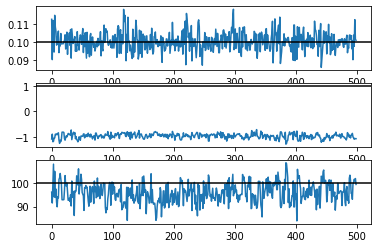

In [124]:

plt.figure()
plt.subplot(311)
plt.plot(states[0][:,0])
plt.axhline(noise,c='k')

plt.subplot(312)
plt.plot(states[0][:,1])
plt.axhline(η,c='k')

plt.subplot(313)
plt.plot(states[0][:,2])
plt.axhline(ℓ,c='k')